# Motion and Optical Flow Excercise

In this excercise, you will learn to use the FlowNet to calculate optical flow between a pair of test images.

This excercise includes **1 part**.

<!-- In Excercise Part 1, you will implement and test the Lucas-Kanade algorithm.  -->

In Excercise Part 1, you will use trained FlowNet to estimate optical flow.

**Before you begin, please upload the folder Practice containing colab notebook (optical_flow.ipynb), Python script (FlowNet_utils.py), test image pair (I1.png, I2.png) and checkpoint of FlowNet (flownets_EPE1.951.pth.tar) to your Google Drive.** 

**To do so, select "Folder upload" from "My Drive" drop down menu, as shown below, and then upload.**

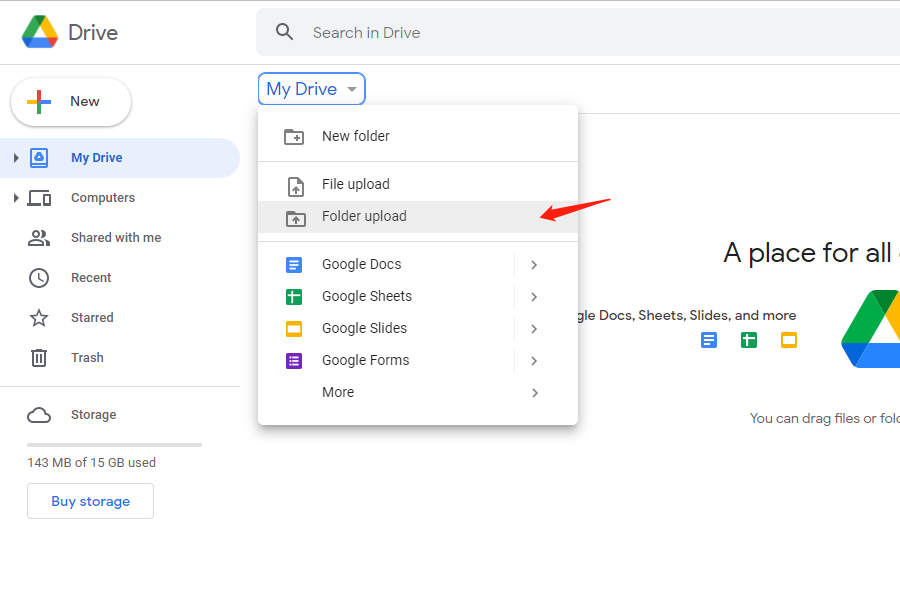

**You should see Practice under Folders after uploading.**

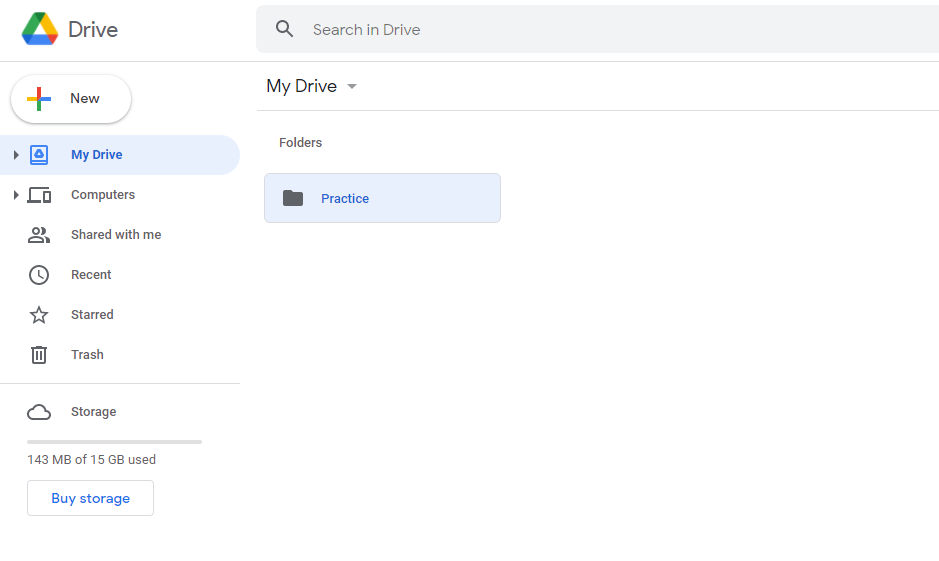




# Excercise Part 1: FlowNet

In Excercise Part 1, perform the following steps.

1.1: Run the provided setup code.

1.2: Run the code to import functions and class.

1.3: Run the provided code to configure the FlowNet model and set the values of model parameters.

1.4: Run the provided code to load test image pair.

1.5: Run the provided code to test the FlowNet model and visualize the estimated optical flow. 

1.6: Answer questions in 1.6.1.

STEP 1.1: SETUP CODE FOR EXCERCISE PART 1

In [1]:
import tensorflow as tf
import numpy as np
import os
import os.path as osp

from PIL import Image
import matplotlib.pyplot as plt

!pip install nbimporter
import nbimporter

img_height = 240
img_width = 256

folder_DIR = 'My Drive/Practice'

STEP 1.2: IMPORT THE PROVIDED FUNCTIONS AND CLASSES

Mount your Google Drive. You will be prompted to sign in your Google Account and allow access.

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


Run the code to import the provided functions (load_checkpoint, flow2rgb) and class (FlowNetS) from FlowNet_utils.py

In [3]:
os.chdir(osp.join('/content/gdrive', folder_DIR))
from FlowNet_utils import FlowNetS, load_checkpoint, flow2rgb 

STEP 1.3: CONFIGURE THE FLOWNET MODEL AND LOAD PARAMETER VALUES

In [7]:
# Configure the FlowNet model
input = tf.keras.Input(shape=(img_height,img_width,6), batch_size=1)
output = FlowNetS(batchNorm=False)(input)
model_FlowNetS = tf.keras.Model(inputs=input, outputs=output)

# Load parameter values from checkpoint
checkpoint_location = osp.join('/content/gdrive', folder_DIR, 'flownets_EPE1.951.pth.tar')
trained_model_FlowNetS = load_checkpoint(model_FlowNetS, checkpoint_location)

STEP 1.4: LOAD TEST IMAGE PAIR

Run the provided code to upload test image pair and visualize. Note that since Google Drive has already been mounted, test images can be read from the folder Practice in Google Drive. 

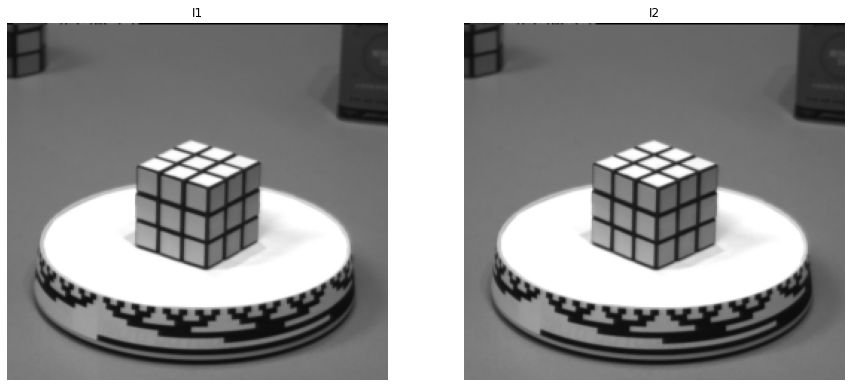

In [8]:
# Read I1.png, I2.png and convert to numpy arrays
I1 = Image.open(osp.join('/content/gdrive', folder_DIR, 'I1.png')).convert('L')
I2 = Image.open(osp.join('/content/gdrive', folder_DIR, 'I2.png')).convert('L')

I1 = I1.resize((img_width, img_height))
I2 = I2.resize((img_width, img_height))

I1 = np.tile(np.expand_dims(I1, -1), (1,1,3))
I2 = np.tile(np.expand_dims(I2, -1), (1,1,3))

I1 = np.array(I1)
I2 = np.array(I2)

# Visualize
plt.rcParams['figure.figsize'] = (15.0, 18.0)
plt.subplot(1,2,1)
plt.imshow(I1, cmap='gray', vmin=0, vmax=255)
plt.title('I1')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(I2, cmap='gray', vmin=0, vmax=255)
plt.title('I2')
plt.axis('off')
plt.show()

STEP 1.5: TEST THE FLOWNET MODEL AND VISUALIZE

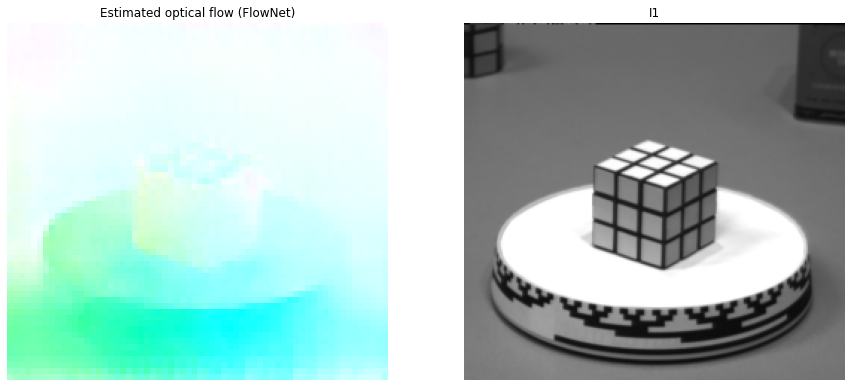

In [9]:
# Construct FlowNet input
I1_tf = tf.convert_to_tensor(I1, dtype=tf.float32) # [h, w, 3]
I2_tf = tf.convert_to_tensor(I2, dtype=tf.float32) # [h, w, 3]

I1_tf = (I1_tf/255) - tf.reshape(tf.constant([0.411,0.432,0.45]), [1,1,3])
I2_tf = (I2_tf/255) - tf.reshape(tf.constant([0.411,0.432,0.45]), [1,1,3])

input = tf.expand_dims(tf.concat([I1_tf, I2_tf], 2), 0)

# Estimate optical flow
optical_flow = trained_model_FlowNetS(input)

# Visualize
optical_flow_rgb_map = flow2rgb(np.transpose(np.squeeze(optical_flow), (2,0,1)))
optical_flow_rgb_map = np.transpose(optical_flow_rgb_map, (1,2,0))

plt.rcParams['figure.figsize'] = (15.0, 18.0)
plt.subplot(1,2,1)
plt.imshow(optical_flow_rgb_map)
plt.axis('off')
plt.title('Estimated optical flow (FlowNet)')
plt.subplot(1,2,2)
plt.imshow(I1)
plt.axis('off')
plt.title('I1')
plt.show()

STEP 1.6: ANSWER THE QUESTIONS BELOW

1.6.1: Save the visualization in step 1.5 as a PNG or GIF image and insert the saved image below.

Your Answer: *fill this in.*